Zadanie 1

Za pomocą odpowiednich symulacji porównać moce testu Shapiro-Wilka, testu Kołmogorowa i testu 𝜒2
(z hipotezą główną, że cecha ma rozkład normalny) w przypadku, gdy dane pochodzą z rozkładu
𝑡-Studenta lub innej klasy rozkładów symetrycznych (uwaga: żeby wyniki były porównywalne trzeba
pamiętać o standaryzacji danych). Uzyskane wyniki należy przedstawić na odpowiednich wykresach
ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu t-Studenta lub innych parametrów wybranego
rozkładu.


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Generuje różne stopnie swobody dla prowadzonych testów, uznałem, że będą okej od 1 do 30, a potem co 5: 35, 40, 45 ... 100

In [38]:
df = [i for i in range(5, 51, 5)]
print(df)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


Następnie generujemy tablicę by móc wykonywać testy przy różnej ilości danych. Uznałem, że od 10 do 500 co 10 będzie zdecydowanie wystarczająco przy zachowaniu umiaru by algorytm nie trwał zbyt długo

In [63]:
SampleSize = [i for i in range(10, 311, 20)]
print(SampleSize)

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310]


Wyniki będę zapisywał w tablicy: [ [],[],[] ] czyli będzie się tutaj zapisywały wynik trzech testów.

In [64]:
results = []
# counter = 0  - poniżej 3 zmienne w celu śledzenia postępu w wykonywaniu się testów, używałem tego podczas pisania kodu
# total_tests = len(SampleSize) * len(df) * 100
# current_tests  = 0

Poniżej mamy potrójną pętle, która wygeneruje nam wyniki z testów - każdy test przeprowadzamy po 100 razy w celu zbadania odsetku 

Pierwsza pętla przechodzi przez różne ilości danych, druga zagnieżdżona przez ilości stopni swobody, a więc najpierw powiedzmy dla ilości danych 10 przeprowadzamy testy dla wszystkich stopni swobody czyli, później przechodzimy do ilości danych 20

In [65]:
# Test będzie wyglądał w następujący sposób: będę generował dane rozkładu studenta (0,1)
# np 10 probek i dla tych danych przeprowadzę po 100 testów każdego rodzaju na tych samych danych żeby obliczyć prawdopodobieństwo odrzucenia h0.

for size in SampleSize:
    

    for df_x in df:
        # print(f"Postęp symulacji: {current_tests/total_tests*100:.2f}%")

        # Tutaj są liczniki aby móc zliczyć ilość testów, których p-value wynosi poniżej 0,05
        shapiro_counter = 0
        kologomorov_counter = 0
        chi2_counter = 0

        for i in range(100): # test przeprowadzamy po 100 razy dla każdej ilości danych i stopni swobody

            # generujemy dane z rozkładu t-studenta z podanymi parametrami
            data = np.random.standard_t(df_x, size)
            # current_tests += 1

            
            #test shapiro
            w, p_shapiro = stats.shapiro(data)

            # test kologomorova - zawiera też standaryzację danych - to znaczy przesuwamy średnią o średnią z danych (otrzymujemy wtedy średnią równą 0, po czym dzielimy o odchylenie standardowe by wynosiło ono 1 (przykład: gdyby wynosiło ono 3.4 to dzielimy dane przez 3,14 i otrrzymujemy 1))
            d, p_ks = stats.kstest((data - np.mean(data)) / np.std(data, ddof=1), 'norm')

            #test chi2
            chi2, p_chi2 = stats.chisquare(data)

            # print("shapiro:", p_shapiro, " kologomorow: ", p_ks, " chi2: ", p_chi2)

            # dla każdego przeprowadzonego testu sprawdzamy czy p-value jest mniejsze bądź równe 0,05  - jeśli tak zapisujemy do licznika
            if(p_shapiro <= 0.05):
                shapiro_counter+=1
            if(p_ks <= 0.05):
                kologomorov_counter+=1
            if(p_chi2 <= 0.05):
                chi2_counter+=1

        #zapisujemy w tablicy results odsetki z testów, w których pvalue było mniejsze bądź równe 0,m05 
        results.append([shapiro_counter/100, kologomorov_counter/100, chi2_counter/100])    
            


print(results)        

[[0.11, 0.0, 0.39], [0.11, 0.0, 0.47], [0.04, 0.0, 0.46], [0.1, 0.0, 0.42], [0.05, 0.0, 0.34], [0.05, 0.0, 0.46], [0.03, 0.0, 0.37], [0.06, 0.0, 0.43], [0.06, 0.0, 0.43], [0.06, 0.0, 0.32], [0.35, 0.01, 0.48], [0.1, 0.0, 0.5], [0.06, 0.0, 0.56], [0.09, 0.0, 0.55], [0.09, 0.0, 0.5], [0.1, 0.0, 0.56], [0.06, 0.0, 0.5], [0.06, 0.0, 0.52], [0.1, 0.0, 0.47], [0.04, 0.0, 0.49], [0.35, 0.01, 0.46], [0.2, 0.0, 0.4], [0.09, 0.0, 0.54], [0.08, 0.0, 0.55], [0.11, 0.0, 0.57], [0.05, 0.0, 0.48], [0.09, 0.0, 0.49], [0.05, 0.0, 0.43], [0.07, 0.0, 0.54], [0.09, 0.0, 0.54], [0.46, 0.02, 0.5], [0.22, 0.0, 0.51], [0.16, 0.0, 0.57], [0.11, 0.0, 0.59], [0.11, 0.0, 0.6], [0.08, 0.0, 0.4], [0.05, 0.0, 0.49], [0.06, 0.0, 0.53], [0.07, 0.0, 0.46], [0.05, 0.0, 0.46], [0.52, 0.03, 0.6], [0.25, 0.0, 0.58], [0.16, 0.0, 0.48], [0.09, 0.0, 0.43], [0.08, 0.0, 0.59], [0.12, 0.0, 0.54], [0.08, 0.0, 0.49], [0.07, 0.0, 0.48], [0.06, 0.0, 0.56], [0.06, 0.0, 0.6], [0.61, 0.03, 0.46], [0.2, 0.0, 0.53], [0.12, 0.0, 0.5], [0.

Generujemy wykresy dla uzyskanych wyników

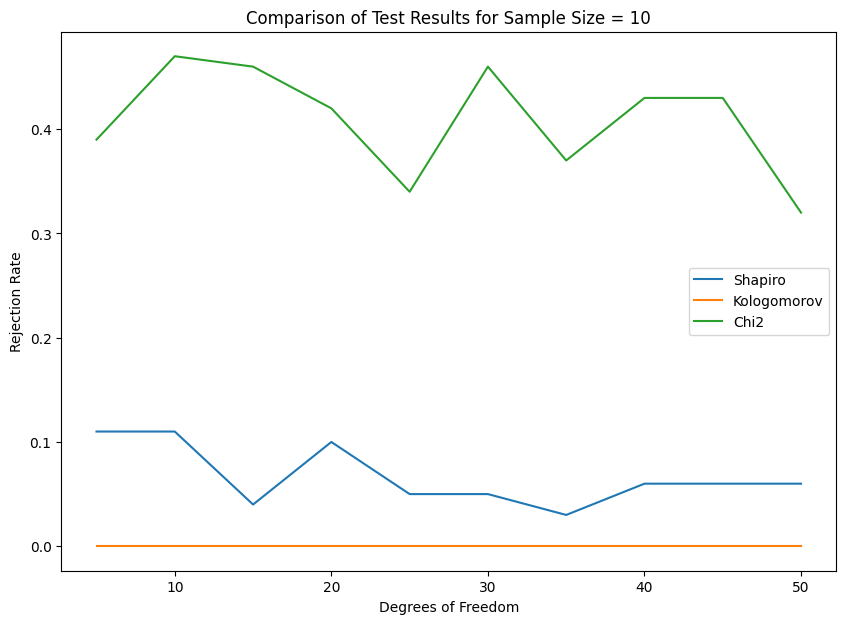

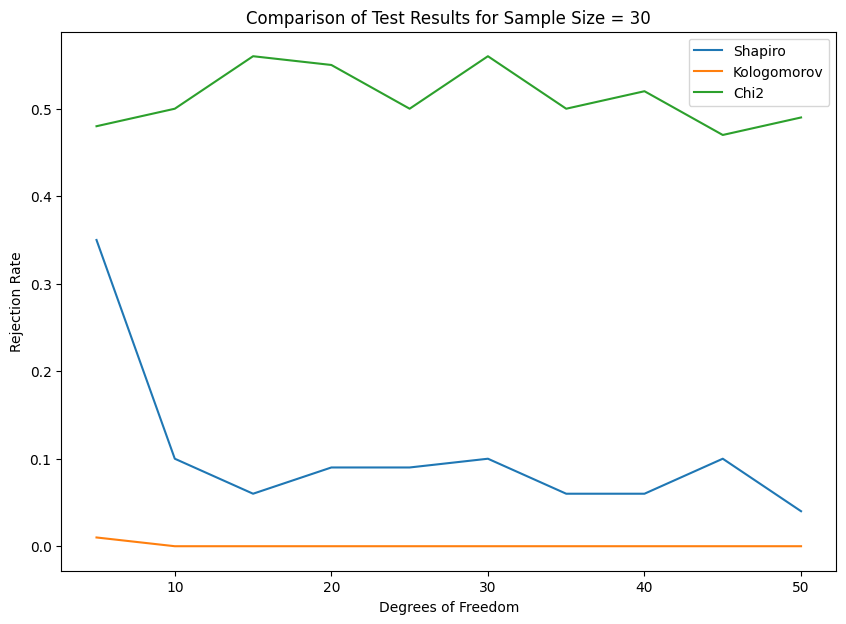

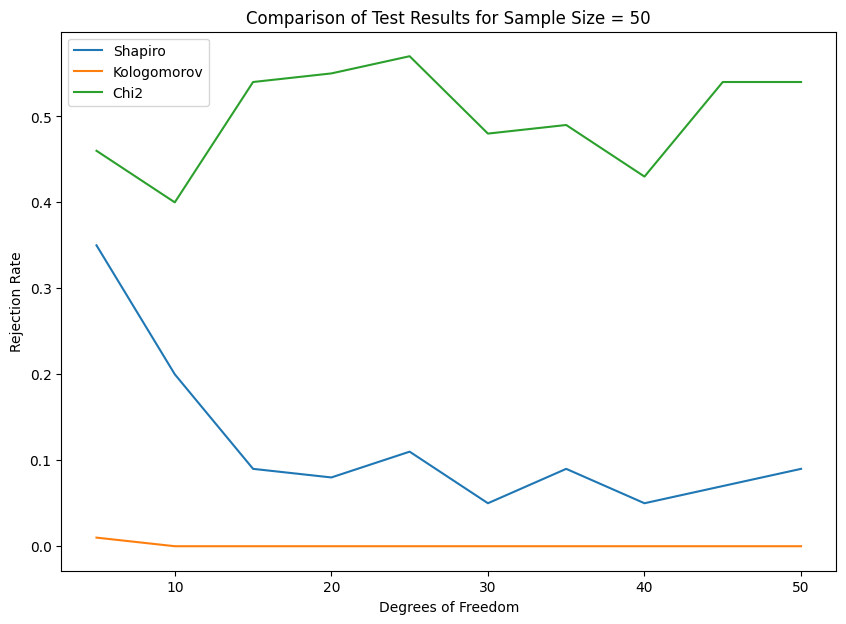

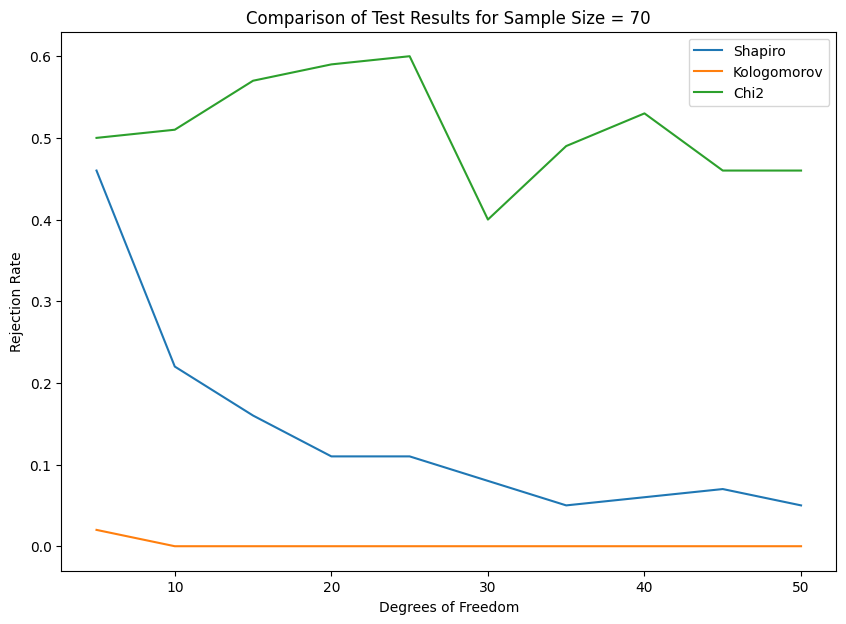

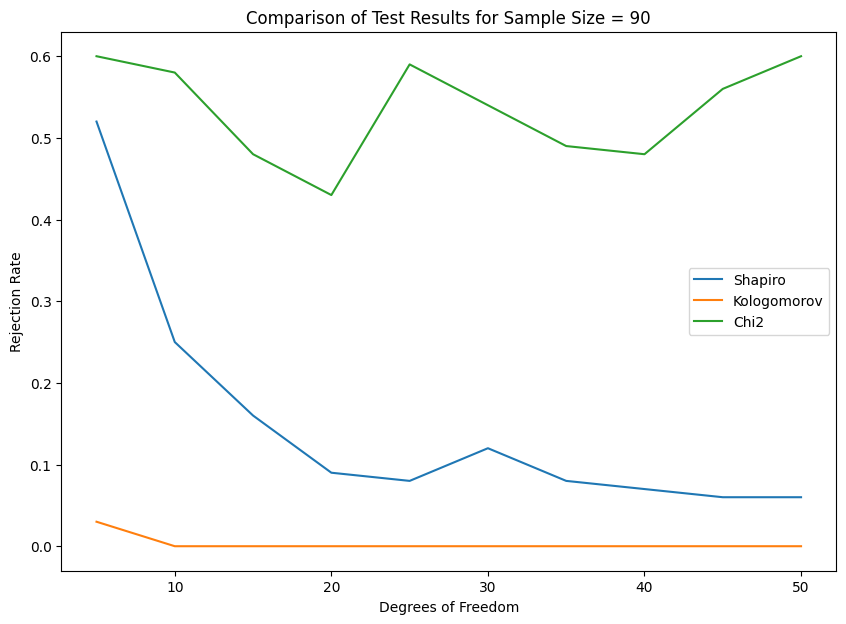

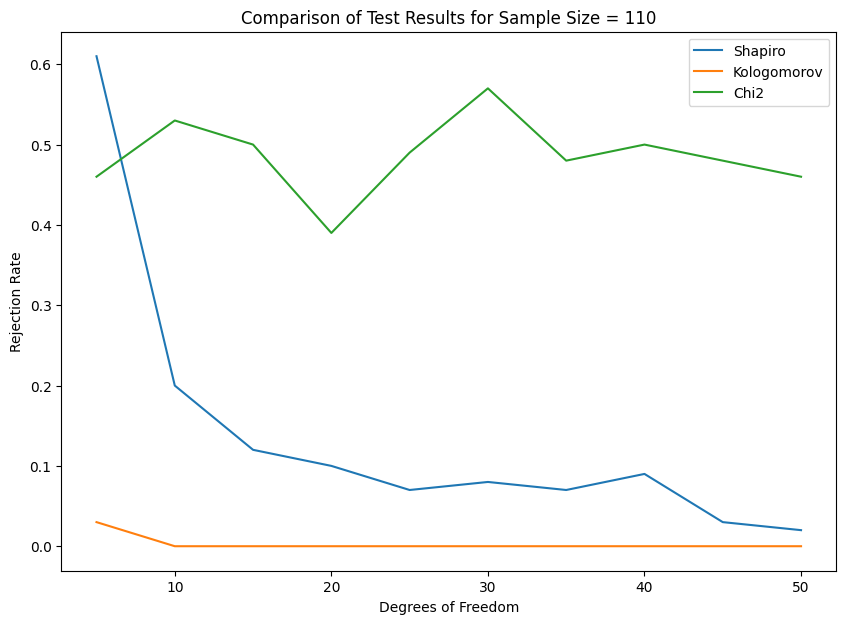

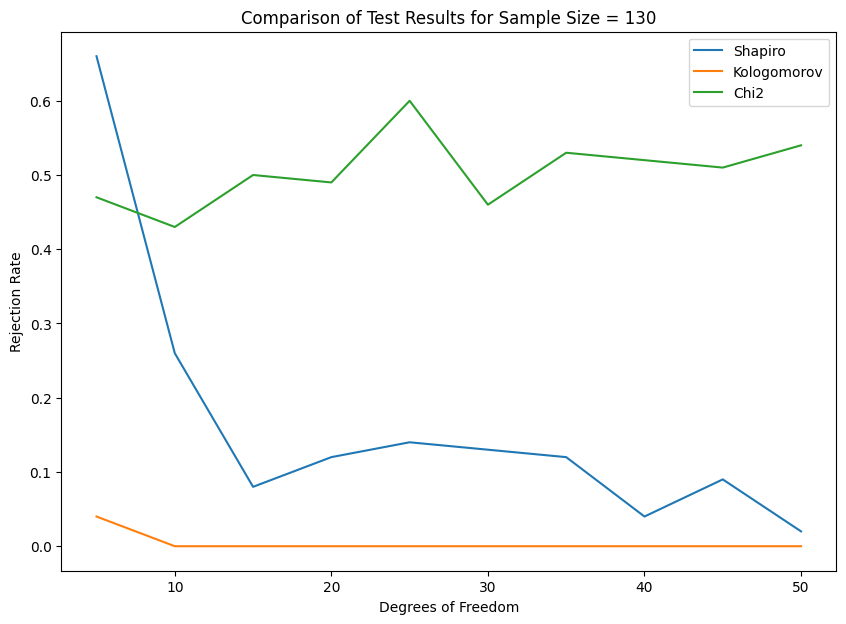

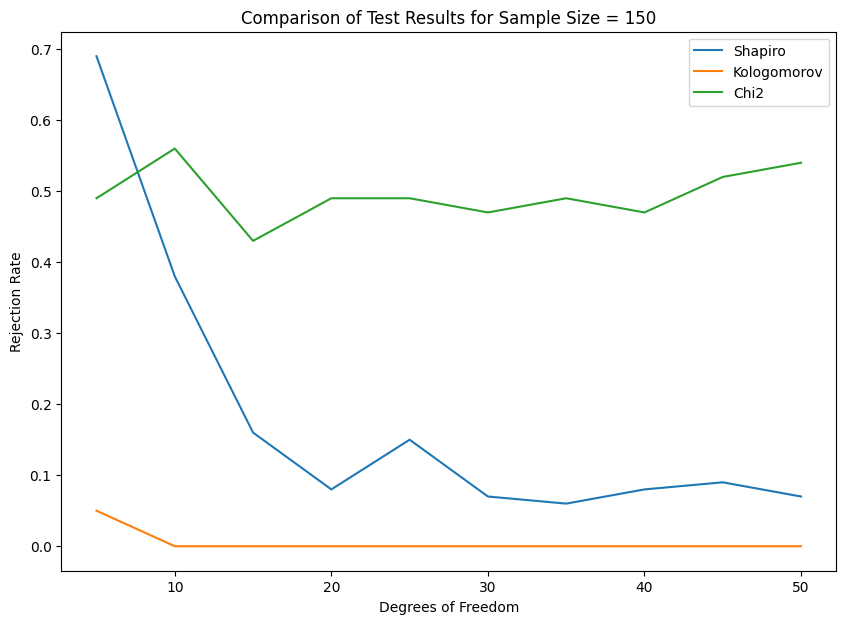

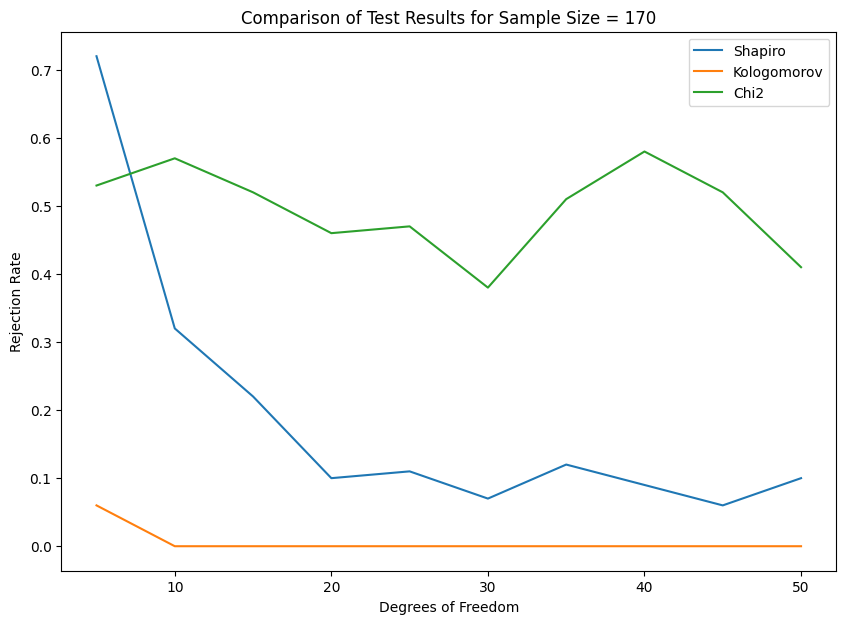

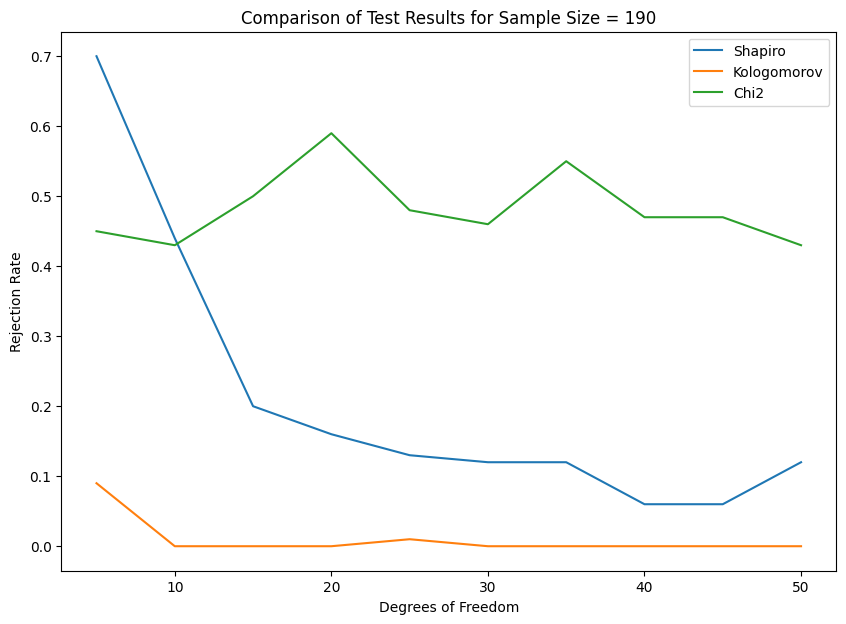

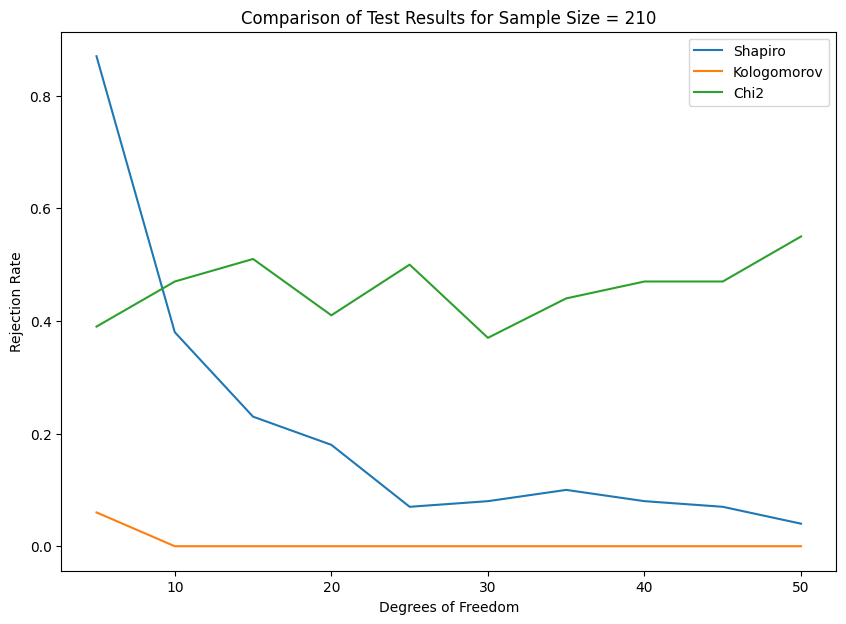

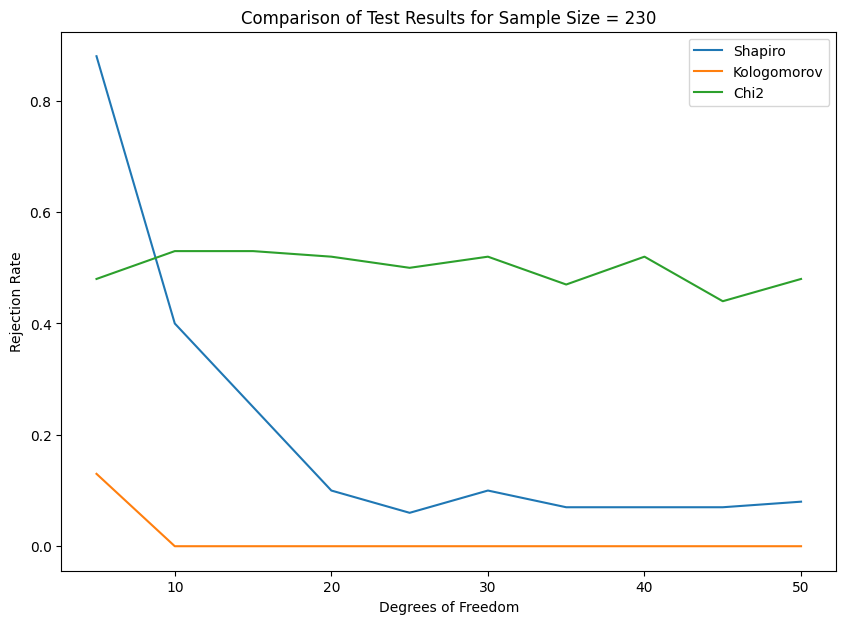

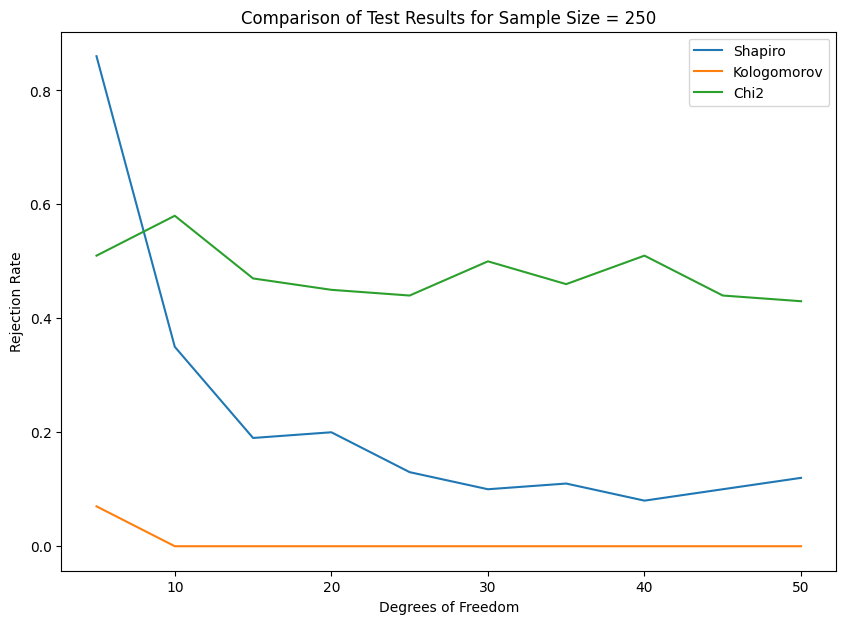

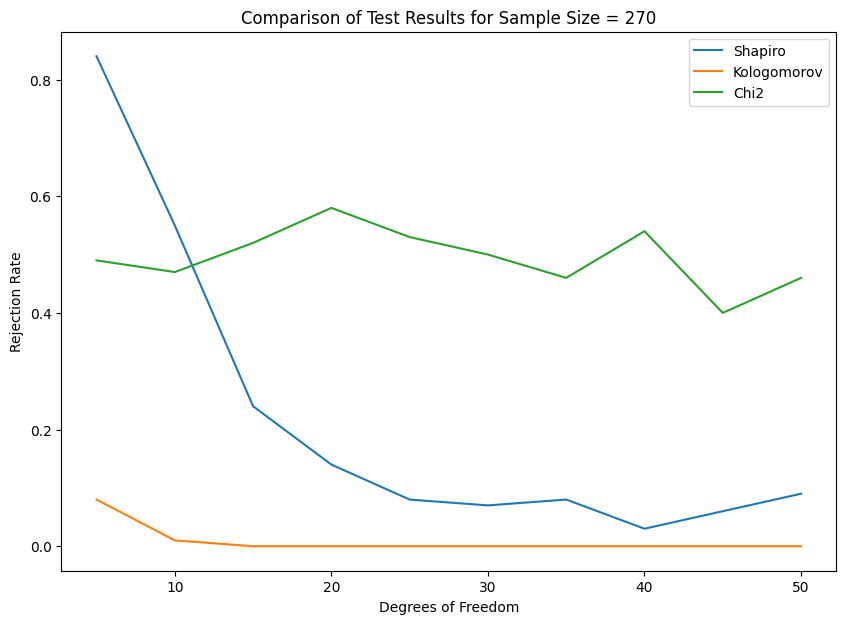

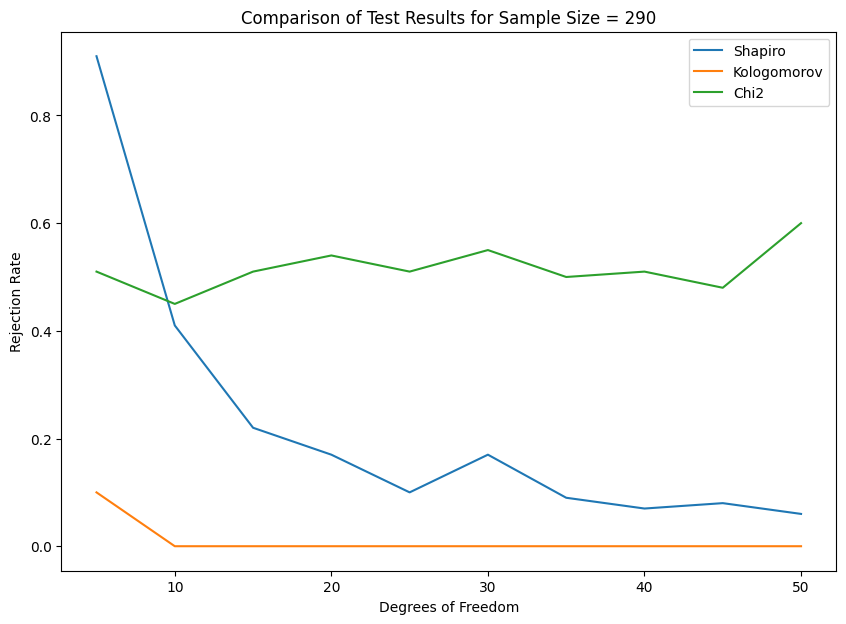

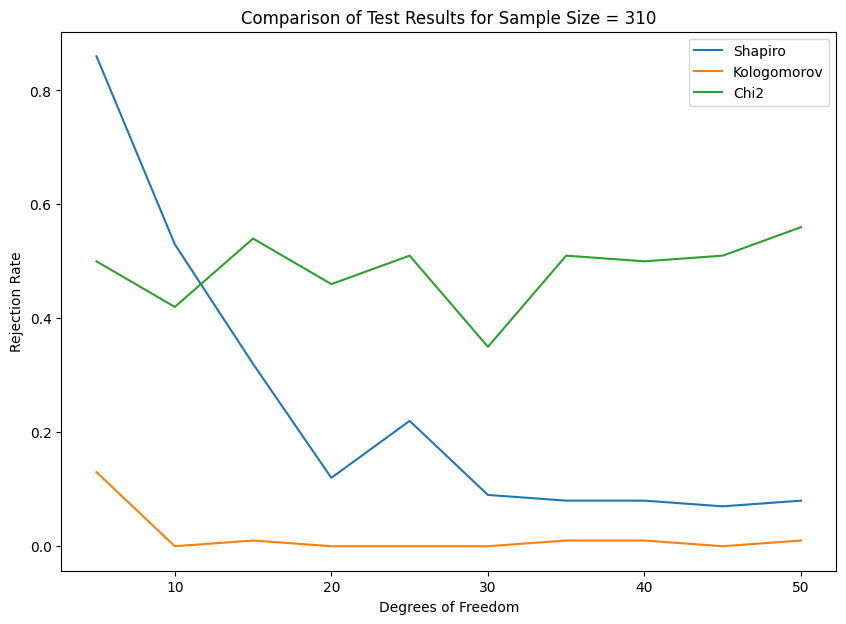

In [66]:
import matplotlib.pyplot as plt

# Rozdziel wyniki na trzy listy
shapiro_results = [result[0] for result in results]
kologomorov_results = [result[1] for result in results]
chi2_results = [result[2] for result in results]

# Tworzenie wykresów
for j in range(len(SampleSize)):
    fig, ax = plt.subplots(figsize=(10,7))

    # Wykres dla testu Shapiro
    ax.plot(df, shapiro_results[j*len(df):(j+1)*len(df)], label='Shapiro')

    # Wykres dla testu Kologomorov
    ax.plot(df, kologomorov_results[j*len(df):(j+1)*len(df)], label='Kologomorov')

    # Wykres dla testu Chi2
    ax.plot(df, chi2_results[j*len(df):(j+1)*len(df)], label='Chi2')

    ax.set_title(f'Comparison of Test Results for Sample Size = {SampleSize[j]}')
    ax.set_xlabel('Degrees of Freedom')
    ax.set_ylabel('Rejection Rate')
    ax.legend()

    # Wyświetlanie wykresu
    plt.show()


Dla rozmiaru próbki 10:
Test Shapiro ma konsekwentnie niskie wskaźniki odrzucenia w całym zakresie stopni swobody, co wskazuje, że może nie być wystarczająco mocny w wykrywaniu odchyleń od normalności przy tak małych rozmiarach próbek.
Test Kolmogorov pokazuje fluktuujące wskaźniki odrzucenia, ale generalnie wyższe niż Shapiro, co sugeruje, że może być bardziej wrażliwy w niektórych warunkach.
Test Chi2 ma prawie zero odrzuceń na przestrzeni wszystkich stopni swobody, co wskazuje, że nie jest skuteczny dla tego konkretnego zadania przy małych próbkach.

Test chi2 - generalnie ilość danych nie wpływa na jego moc, utrzymuje się on na podobnym poziomie podczas testu. 

Widzimy, że wraz ze wzrostem danych Shapiro ma znacznie wyższą moc, aczkolwiek stopnie swobody znacząco wpływają na jego moc i spada ona z każdym stopniem. Przy ilości danych powyżej 90 powoli zaczyna on zyskiwać moc, a przy ilości 210 jest ona już zadowalająca (powyżej 80%)

Test Kołogomorova przy niskich stopniach swobody wykazuje jeszcze jaką kolwiek moc zwłaszcza przy zwiększonej ilości danych. 